# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
testing_file  = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f: train = pickle.load(f)
with open(testing_file, mode='rb') as f:  test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test   = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#= below is the code to map sign classifier digit with image
#= Makes the data verification much much easier
import csv
SignD = {}
reader = csv.reader(open('signnames.csv', 'r'))
for row in reader: 
    try: SignD[int(row[0])] = row[1]
    except: print('Row not int', row)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Row not int ['ClassId', 'SignName']


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

8 Speed limit (120km/h)


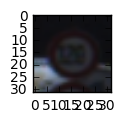

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index], SignD[y_train[index]])
#= Just keep hitting Ctl-Return to visualize
#= some of the images are really poor!!!
#= The csv import above really Helps!

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42]
min 210
Max 2250


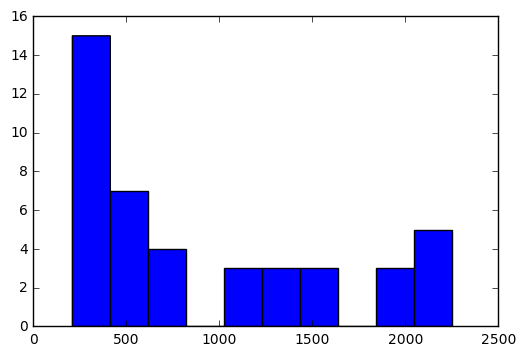

(0, 210) Speed limit (20km/h)
(19, 210) Dangerous curve to the left
(37, 210) Go straight or left


In [4]:
import numpy as np

print(train['labels'][:20])
print(train['labels'][-20:])
# Looking at above definitely Not OPTIONAL

### Generate data additional data (OPTIONAL!) 
### and split the data into training/validation/testing sets here.
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#= sample distribution 43 catagories but 
labelSet = set(train['labels'])
yLabelCnt = [ (ys, np.sum(np.equal(ys,train['labels']))) for ys in set(train['labels']) ]
print ('min', min( yv[-1] for yv in yLabelCnt))
print ('Max', max( yv[-1] for yv in yLabelCnt))
plt.hist(list(yv[-1] for yv in yLabelCnt))
plt.show()
#= as shown below we got some signs more than others
#= problem is how do you keep balanced same or similar.
#= 210*43 won't be enough to train on
#= ....?E@$!@
#= Really low ones are, 
#= which I will see if it can be predicted correctly in Q below
for ix in (0,19,37):
    print ( yLabelCnt[ix], SignD[ix] )

In [5]:
#= Also contamination of samples could b a prb (same images in both train/test)
import hashlib

train_hashed = [ hashlib.sha1(x).digest() for x in train['features'] ]
test_hashed  = [ hashlib.sha1(x).digest() for x in test['features'] ]
print(len(train_hashed), len(set(train_hashed)))
print(len(test_hashed), len(set(test_hashed)))

test_in_train  = np.in1d(test_hashed,  train_hashed)
train_in_test  = np.in1d(train_hashed, test_hashed)
print('Cross Dups', np.sum(test_in_train))
#= we got No intrinsic for both train/test
#= & only 8 cross contamination, which is good
test_keep = ~test_in_train

#= Just repulling the data - ensures that code is clean
X_train, y_train = train['features'],     train['labels']
X_test,  y_test  = test['features'][test_keep], test['labels'][test_keep]
print(X_test.shape)

39209 39209
12630 12630
Cross Dups 8
(12622, 32, 32, 3)


In [6]:
test_in_train.shape
te_ix = list( np.where(test_in_train)[0] ); print(te_ix) 
tr_ix = list( np.where(train_in_test)[0] ); print(tr_ix) 
train['features'][tr_ix[0]].shape
plt.close('all')
for i in range(len(te_ix)):    print(train['labels'][tr_ix[i]], test['labels'][te_ix[i]])
xx = """ # Not quite working in Jupyter but... seems like it's doing what it's supposed to
    Left = train['features'][tr_ix[i]].squeeze()
    Right = test['features'][te_ix[i]].squeeze()

    f, axarr = plt.subplots(1, 2)
    axarr[0, 0].set_title('Train')
    axarr[0, 0].imshow(Left, cmap='gray')
    axarr[0, 0].set_title('Test')
    axarr[0, 0].imshow(Right, cmap='gray')
    plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
    plt.show()
    plt.close('all')  """

[666, 2291, 3546, 3594, 4548, 9384, 9575, 11906]
[22950, 22953, 22956, 22957, 22960, 22963, 22966, 22969]
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14


In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#= Just using the advised 20%
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Define your architecture here.
### Feel free to use as many code cells as needed.
#= Instead of 
def conv2d(x, W, bSz, strides=1, padding='SAME'):
    #conv2D wrapper, w/ biases & ReLu activation
    assert padding in ('SAME', 'VALID')
    b = tf.Variable(tf.zeros(bSz))
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2, padding='SAME'):
    return tf.nn.max_pool( x, ksize=[1,k,k,1], 
                            strides=[1,k,k,1],
                              padding=padding)

#28x28x1  1st layer shape the image to
def LeNet(x, dbg=False):
    # Hyperparameters
    mu = 0        # This assume that mean is Zero
    sigma = 0.1   # and sigma is .1
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    cnn1_Wgt = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean=mu, stddev=sigma)) # 1 as input is 1
    cnn1_Layr = conv2d(x, cnn1_Wgt, 6, strides=1, padding='VALID')
    #conv2d(x, cnn1_Wgt, cnn1_b, strides=1, padding='SAME') #<tf.Tensor 'Relu_5:0' shape=(55000, 32, 32, 6)..
    if dbg: print( cnn1_Layr )
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.    
    pool1Layr = maxpool2d(cnn1_Layr, k=2, padding='SAME') # 'VALID shows same shape ???????
    if dbg: print( pool1Layr )
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    cnn2_Wgt = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    cnn2_Layr = conv2d(pool1Layr, cnn2_Wgt, 16, strides=1, padding='VALID')
    if dbg: print( cnn2_Layr )
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2Layr = maxpool2d(cnn2_Layr, k=2, padding='VALID') # 'VALID o SAME has same shape ???????
    if dbg: print( pool2Layr )
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flattnd = flatten( pool2Layr )
    if dbg: print( flattnd )
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_Layr  = tf.matmul(flattnd, fc1_W) + tf.Variable(tf.zeros(120))
    if dbg: print( fc1_Layr )
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_Layr  = tf.nn.relu( tf.matmul(fc1_Layr, fc2_W) + tf.Variable(tf.zeros(84)) )
    if dbg: print( fc2_Layr )
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    logitL  = tf.matmul(fc2_Layr, fc3_W) + tf.Variable(tf.zeros(n_classes))
    if dbg: print( logitL )
    return logitL

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Kept it way it was for this run, but will update the model & redo after all Q's are answered

In [9]:
EPOCHS = 30
BATCH_SIZE = 128
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# ## Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# ## Train the Model
# Run the training data through the training pipeline to train the model.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    print('BATCH_SIZE', BATCH_SIZE)
    saver.save(sess, 'lenet')
    print("Model saved")
    #=EPOCH 10 ...  Validation Accuracy = 0.933 BATCH_SIZE 128
    #=EPOCH 60 ...  Validation Accuracy = 0.948 BATCH_SIZE 1000
    #=EPOCH 100 ... Validation Accuracy = 0.971 BATCH_SIZE 128 'does not improve beyond .98 after 30~ or so
    #=EPOCH 10 ...  Validation Accuracy = 0.075 BATCH_SIZE 12800
    #=EPOCH 30 ...  Validation Accuracy = 0.929 BATCH_SIZE 1280
    #=EPOCH 30 ...  Validation Accuracy = 0.903 BATCH_SIZE 12 # slow & UNSTABLE!
    #=EPOCH 30 ...  Validation Accuracy = 0.948 BATCH_SIZE 328 #starts low flatten around 25~
    #=EPOCH 30 ...  Validation Accuracy = 0.960 BATCH_SIZE 128 # seems like a winner!: stable!!
    #=


Training...

EPOCH 1 ...
Validation Accuracy = 0.654

EPOCH 2 ...
Validation Accuracy = 0.849

EPOCH 3 ...
Validation Accuracy = 0.882

EPOCH 4 ...
Validation Accuracy = 0.916

EPOCH 5 ...
Validation Accuracy = 0.926

EPOCH 6 ...
Validation Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.937

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.945

EPOCH 10 ...
Validation Accuracy = 0.950

EPOCH 11 ...
Validation Accuracy = 0.950

EPOCH 12 ...
Validation Accuracy = 0.956

EPOCH 13 ...
Validation Accuracy = 0.948

EPOCH 14 ...
Validation Accuracy = 0.952

EPOCH 15 ...
Validation Accuracy = 0.959

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.958

EPOCH 18 ...
Validation Accuracy = 0.959

EPOCH 19 ...
Validation Accuracy = 0.964

EPOCH 20 ...
Validation Accuracy = 0.956

EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.957

EPOCH 23 ...
Validation Accuracy = 0.968

EPOCH 24 ...
Validation Accura

### The last few iteration of the epoch seems unstable. This probably has to do with fact that SGD or model itself is unstable. Will test out new SGD.

In [11]:
# ## Evaluate the Model
# Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
# 
# Be sure to only do this once!
# 
# If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.898


**Answer:**
#- The above result seems to be quite dependent on the shuffle - had 91% on other run **

In [12]:
# second model with 
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.RMSPropOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# ## Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# ## Train the Model
# Run the training data through the training pipeline to train the model.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        #if i < EPOCHS*.86 and i%10 !=0: continue
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    print('BATCH_SIZE', BATCH_SIZE)
    saver.save(sess, 'lenet')
    print("Model saved")

#GradientDescentO 0.054 EPOCHS=100 BATCH_SIZE=62800 TAccuracy 0.057 Definitly not way to go xxx
#RMSPropOptimizer EPOCHS=100 BATCH_SIZE=12800 .933 TAccuracy 0.859
#Adams 0.306 EPOCHS=100 BATCH_SIZE=62800 
#RMSPropOptimizer Above but I decreased the learning rate. Jumps around less & Smaller BATCH_SIZE seems to work better 

Training...

EPOCH 1 ...
Validation Accuracy = 0.612

EPOCH 2 ...
Validation Accuracy = 0.751

EPOCH 3 ...
Validation Accuracy = 0.830

EPOCH 4 ...
Validation Accuracy = 0.847

EPOCH 5 ...
Validation Accuracy = 0.790

EPOCH 6 ...
Validation Accuracy = 0.833

EPOCH 7 ...
Validation Accuracy = 0.942

EPOCH 8 ...
Validation Accuracy = 0.939

EPOCH 9 ...
Validation Accuracy = 0.948

EPOCH 10 ...
Validation Accuracy = 0.907

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.958

EPOCH 13 ...
Validation Accuracy = 0.958

EPOCH 14 ...
Validation Accuracy = 0.951

EPOCH 15 ...
Validation Accuracy = 0.964

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 17 ...
Validation Accuracy = 0.950

EPOCH 18 ...
Validation Accuracy = 0.946

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.969

BATCH_SIZE 128
Model saved


In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.890


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
    As shown above tried different batch & epoch for now.
    Will revisit
    
    #EPOCH 10 ...  Validation Accuracy = 0.933 BATCH_SIZE 128
    #EPOCH 60 ...  Validation Accuracy = 0.948 BATCH_SIZE 1000
    #EPOCH 100 ... Validation Accuracy = 0.971 BATCH_SIZE 128 'does not improve beyond .98 after 30~ or so
    #EPOCH 10 ...  Validation Accuracy = 0.075 BATCH_SIZE 12800
    #EPOCH 30 ...  Validation Accuracy = 0.929 BATCH_SIZE 1280
    #EPOCH 30 ...  Validation Accuracy = 0.903 BATCH_SIZE 12 # slow & UNSTABLE!
    #EPOCH 30 ...  Validation Accuracy = 0.948 BATCH_SIZE 328 #starts low flatten around 25~
    #EPOCH 30 ...  Validation Accuracy = 0.960 BATCH_SIZE 128 # seems like a winner stable
    """ For now varying bach & 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

For now trial & Error. I will attempt to improve on it once I get through the rest of the Q & revisit the model. Certainly using different activation function, optimization, SDG, etc... would b part of it.
-- Revisited w/ different optimizers & Learning rate. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

#### - Here's code used to get the external images into the environment
print ("""import cv2
import numpy as np
from resizeimage import resizeimage
import matplotlib.pyplot as plt

fnm = '../ExtendedSigns/16.jpeg'

outF =fnm.replace('.jpg', 'o.jpg')
outF =fnm.replace('.png', 'o.jpg')
outF =fnm.replace('.jpeg', 'o.jpg')

with open(fnm, 'r+b') as f:
    with Image.open(f) as image:
        cover = resizeimage.resize_cover(image, [32,32])
        cover.save(outF, image.format)
image = cv2.imread(outF, flags=cv2.IMREAD_COLOR)

print(image.shape)""")

10o.jpeg [' 32', 'End of all speed and passing limits']
11o.jpg [' 2', 'Speed limit (50km/h)']
12o.jpg [' 0', 'Speed limit (20km/h)']
13o.jpg [' 12', 'Priority road']
14o.jpg [' 33', 'Turn right ahead']
15o.jpg [' 12', 'Priority road']
16o.jpg [' 35', 'Ahead only']
1o.jpg [' 23', 'Slippery road']
2o.jpg [' 38', 'Keep right']
3o.jpeg [' 38', 'Keep right']
4o.jpg [' 3', 'Speed limit (60km/h)']
5o.jpg [' 31', 'Wild animals crossing']
6o.jpeg [' 11', 'Right-of-way at the next intersection']
7o.jpg [' 19', 'Dangerous curve to the left']
8o.jpg [' 1', 'Speed limit (30km/h)']
9o.jpeg [' 8', 'Speed limit (120km/h) #']


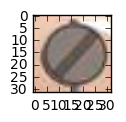

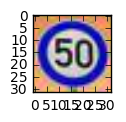

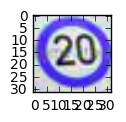

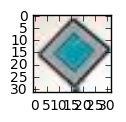

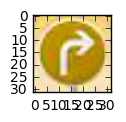

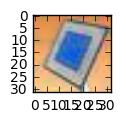

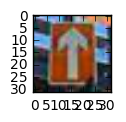

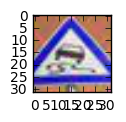

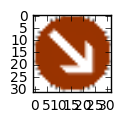

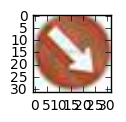

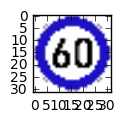

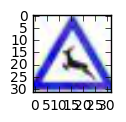

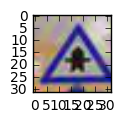

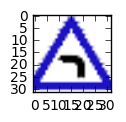

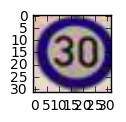

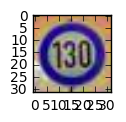

In [14]:
import cv2, csv, glob
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

newD = {}
reader = csv.reader(open('./ExtSigns/labels.csv', 'r'))
for row in reader: 
    try: newD[row[0]] = row[1:]
    except: print('Row not int', row)
    #for fNm in glob.glob('./ExtSigns/*o.jpg'):

keys = list(newD.keys())
keys.sort()
X_ntest = np.zeros((len(keys), 32,32,3), np.int16)
y_ntest = np.zeros(len(keys), np.int16)
for i in range(len(keys)):
    fnm = './ExtSigns/'+keys[i]
    image = cv2.imread(fnm, flags=cv2.IMREAD_COLOR)
    X_ntest[i,:,:,:] = image
    y_ntest[i] = int( newD[keys[i]][0] )
    print(keys[i], newD[keys[i]])
    plt.figure(figsize=(1,1))
    plt.imshow(image.squeeze(), cmap="gray")

** Nota Bene ** 
The last one is 130kmh sign,which has no classifier. I wanted to know would happen to the model with that. So, with that out it's prbably a bit higher.

In [1]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    ntest_accuracy = evaluate(X_ntest, y_ntest)
    print("New Test Accuracy = {:.3f}".format(ntest_accuracy))

NameError: name 'tf' is not defined

## Obviously we have a prblem prediction is pretty much #@$!.
The below shows why. The mean & std of the images are completely off!
We need to change the Mu & Sigma from above.
This is somekind of color prblem, then this would not be corrected by simple mu, sigma correction however. And looking at the pics in matplot shows that issue.
Only simple way to correct that would put the images in same color scale or grayscale the image

* Z scale failed miserably - see Traffic_Sign_Classifier-zScore.ipynb
That's a deadEnd

In [51]:
for i in range(y_ntest.shape[0]):
    ys = np.equal( y_test, y_ntest[i] )
    xs = X_test[ys, :, :, :]
    xf = xs.flatten().reshape(xs.shape[0], (32*32*3))
    print ( 'O %3d %3d %6.2f %6.2f' %(max(xf.flatten()),  min(xf.flatten()), \
                                    np.mean(xf.flatten()),np.std(xf.flatten())) )
    xn = X_ntest[i]
    print ( 'N %3d %3d %6.2f %6.2f' %(max(xn.flatten()),  min(xn.flatten()), \
                                    np.mean(xn.flatten()),np.std(xn.flatten())) )

O 255   5  69.32  60.14
N 255  40 153.27  54.05
O 255   0  79.83  66.22
N 255   0 138.46  75.42
O 255   3  91.12  58.65
N 255   0 173.46  70.45
O 255   0 100.38  74.81
N 255   0 184.95  68.03
O 255   0 109.73  65.20
N 255   0 164.90  74.40
O 255   0 100.38  74.81
N 255   0 155.74  54.51
O 255   0  79.53  69.73
N 255   0  95.66  60.04
O 255   1  72.07  66.51
N 255   0 140.50  65.72
O 255   0  90.41  69.51
N 255   0 142.20 101.28
O 255   0  90.41  69.51
N 255  10 157.30  72.94
O 255   0  65.94  54.87
N 255   0 175.01 105.89
O 255   4  37.18  31.20
N 255   0 194.39  78.94
O 255   0 116.55  78.94
N 244   0 139.35  55.28
O 215   4  37.24  38.25
N 255   0 193.83  96.48
O 255   0 106.55  71.85
N 250   0 124.13  72.48
O 255   5  55.38  43.57
N 255   0 124.76  58.84


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    prediction=tf.argmax(logits,1)
    best = sess.run([prediction],feed_dict={x: X_ntest, y: y_ntest})
    print(best[0])
    print(y_ntest)


[32 12 11  2 11 35  3 12 23  3  5 12 11 12  6 12]
[32  2  0 12 33 12 35 23 38 38  3 31 11 19  1  8]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

1 11o.jpg [' 2', 'Speed limit (50km/h)'] Priority road
2 12o.jpg [' 0', 'Speed limit (20km/h)'] Right-of-way at the next intersection
3 13o.jpg [' 12', 'Priority road'] Speed limit (50km/h)
4 14o.jpg [' 33', 'Turn right ahead'] Right-of-way at the next intersection
5 15o.jpg [' 12', 'Priority road'] Ahead only
6 16o.jpg [' 35', 'Ahead only'] Speed limit (60km/h)
7 1o.jpg [' 23', 'Slippery road'] Priority road
8 2o.jpg [' 38', 'Keep right'] Slippery road
9 3o.jpeg [' 38', 'Keep right'] Speed limit (60km/h)
10 4o.jpg [' 3', 'Speed limit (60km/h)'] Speed limit (80km/h)
11 5o.jpg [' 31', 'Wild animals crossing'] Priority road
13 7o.jpg [' 19', 'Dangerous curve to the left'] Priority road
14 8o.jpg [' 1', 'Speed limit (30km/h)'] End of speed limit (80km/h)
15 9o.jpeg [' 8', 'Speed limit (120km/h) #'] Priority road


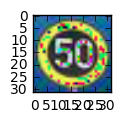

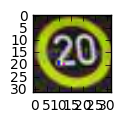

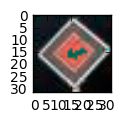

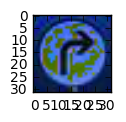

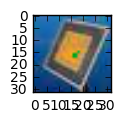

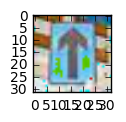

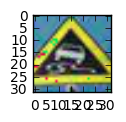

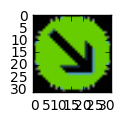

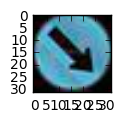

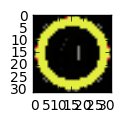

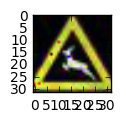

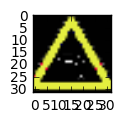

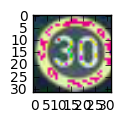

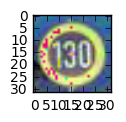

In [44]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
for i in range(len(best[0])):
    if best[0][i] != y_ntest[i]:
        image = X_ntest[i,:,:,:]
        print(i,keys[i], newD[keys[i]], SignD[best[0][i]])
        plt.figure(figsize=(1,1))
        plt.imshow(image.squeeze(), cmap="gray")

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [38]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    top3 = sess.run(tf.nn.top_k(tf.constant(X_ntest), k=3))

In [49]:
top3[1][1][2]
print(top3[1][1][2].shape)
x = "will give you class prediction probability for i-th data set, i_label is the index that goes from 0 to 3 corresponding probability scores of classes with highest to lowest chances of being the class in the test image."

(32, 3)
